In [2]:
!pip install spacy
!python -m spacy download en_core_web_sm
!pip install beautifulsoup4
!pip install textblob

  Obtaining dependency information for spacy from https://files.pythonhosted.org/packages/92/fb/d1f0605e1e8627226c6c96053fe1632e9a04a3fbcd8b5d715528cb95eb97/spacy-3.7.4-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for spacy-legacy<3.1.0,>=3.0.11 from https://files.pythonhosted.org/packages/c3/55/12e842c70ff8828e34e543a2c7176dac4da006ca6901c9e8b43efab8bc6b/spacy_legacy-3.0.12-py2.py3-none-any.whl.metadata
  Obtaining dependency information for spacy-loggers<2.0.0,>=1.0.0 from https://files.pythonhosted.org/packages/33/78/d1a1a026ef3af911159398c939b1509d5c36fe524c7b644f34a5146c4e16/spacy_loggers-1.0.5-py3-none-any.whl.metadata
  Obtaining dependency information for murmurhash<1.1.0,>=0.28.0 from https://files.pythonhosted.org/packages/71/46/af01a20ec368bd9cb49a1d2df15e3eca113bbf6952cc1f2a47f1c6801a7f/murmurhash-1.0.10-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for cymem<2.1.0,>=2.0.2 from https://files.pythonhosted.org/packages/c1/c3/dd

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB 1.4 MB/s eta 0:00:10
     ---------------------------------------- 0.1/12.8 MB 1.2 MB/s eta 0:00:11
     --- ------------------------------------ 1.3/12.8 MB 9.1 MB/s eta 0:00:02
     --------- ------------------------------ 2.9/12.8 MB 15.7 MB/s eta 0:00:01
     ----------- ---------------------------- 3.7/12.8 MB 15.9 MB/s eta 0:00:01
     --------------- ------------------------ 5.1/12.8 MB 18.2 MB/s eta 0:00:01
     -------------------- ------------------- 6.5/12.8 MB 20.6 MB/s eta 0:00:01
     ------------------------- -------------- 8.1/12.8 MB 21.6 MB/s eta 0:00:01
     ----------------------------- ---------- 9.4/12.8 MB 22.3 MB/s eta 0:00:01
     --------------------------------- ----- 11.0/12.8 MB 31.2 MB/s eta 0:00:01
     ------------------------------------- - 12.3/12.8 MB 29.8 MB/s eta 0:00:01
     --------------------------------------  12.8/1

In [3]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

In [8]:
df=pd.read_csv('https://raw.githubusercontent.com/laxmimerit/All-CSV-ML-Data-Files-Download/master/twitter_sentiment.csv',header=None,index_col=0)
df

,1,2,3
0,,,
2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2401,Borderlands,Positive,im coming on borderlands and i will murder you...
2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...
4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...


In [9]:
df.head()

,1,2,3
0,,,
2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2401,Borderlands,Positive,im coming on borderlands and i will murder you...
2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [11]:
df=df[[2,3]].reset_index(drop=True)
df

,2,3
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...
...,...,...
75677,Irrelevant,⭐️ Toronto is the arts and culture capital of ...
75678,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
75679,Positive,Today sucked so it’s time to drink wine n play...
75680,Positive,Bought a fraction of Microsoft today. Small wins.


In [12]:
df.columns=['sentiment','text']
df.head(3)

,sentiment,text
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74996 entries, 0 to 75681
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  74996 non-null  object
 1   text       74996 non-null  object
dtypes: object(2)
memory usage: 1.7+ MB


In [19]:
 df.isnull().sum()
df.dropna(inplace=True)


In [27]:
sum(df['text'].apply(len)>5),sum(df['text'].apply(len)<=5)

(72883, 2113)

In [29]:
print(df.shape)
df=df[df['text'].apply(len)>5]
print(df.shape)

(74996, 2)
(72883, 2)


In [30]:
df['sentiment'].value_counts()

sentiment
Negative      22020
Positive      20186
Neutral       17899
Irrelevant    12778
Name: count, dtype: int64

In [32]:
!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall



  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to c:\users\nalla\appdata\local\temp\pip-req-build-zeuz8t1q
  Resolved https://github.com/laxmimerit/preprocess_kgptalkie.git to commit 96bf02872d9756f29d6cddb8aafaedcd2a39bbb4
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for preprocess-kgptalkie: filename=preprocess_kgptalkie-0.1.3-py3-none-any.whl size=7667 sha256=cb71fd9b3b47f16e547f6833b38e5e1fe86466bb489508f5747236c92a1a354c
  Stored in directory: C:\Users\nalla\AppData\Local\Temp\pip-ephem-wheel-cache-0h3n15_m\wheels\74\fe\05\0d013c54ae5e4afb77c6c480378063827c84f57ea5f554e072
Successfully built preprocess-kgptalkie


  Running command git clone --filter=blob:none --quiet https://github.com/laxmimerit/preprocess_kgptalkie.git 'C:\Users\nalla\AppData\Local\Temp\pip-req-build-zeuz8t1q'


In [33]:
import preprocess_kgptalkie as ps
df.head()

,sentiment,text
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...


In [34]:
df=ps.get_basic_features(df)

In [35]:
df.columns

Index(['sentiment', 'text', 'char_counts', 'word_counts', 'avg_wordlength',
       'stopwords_counts', 'hashtag_counts', 'mentions_counts',
       'digits_counts', 'uppercase_counts'],
      dtype='object')

In [36]:
df.head()

,sentiment,text,char_counts,word_counts,avg_wordlength,stopwords_counts,hashtag_counts,mentions_counts,digits_counts,uppercase_counts
0,Positive,im getting on borderlands and i will murder yo...,43,11,3.909091,6,0,0,1,0
1,Positive,I am coming to the borders and I will kill you...,40,12,3.333333,6,0,0,1,2
2,Positive,im getting on borderlands and i will kill you ...,41,10,4.100000,5,0,0,1,0
3,Positive,im coming on borderlands and i will murder you...,42,10,4.200000,5,0,0,1,0
4,Positive,im getting on borderlands 2 and i will murder ...,46,12,3.833333,6,0,0,2,0


In [37]:
import matplotlib.pyplot as plt
import seaborn as sns


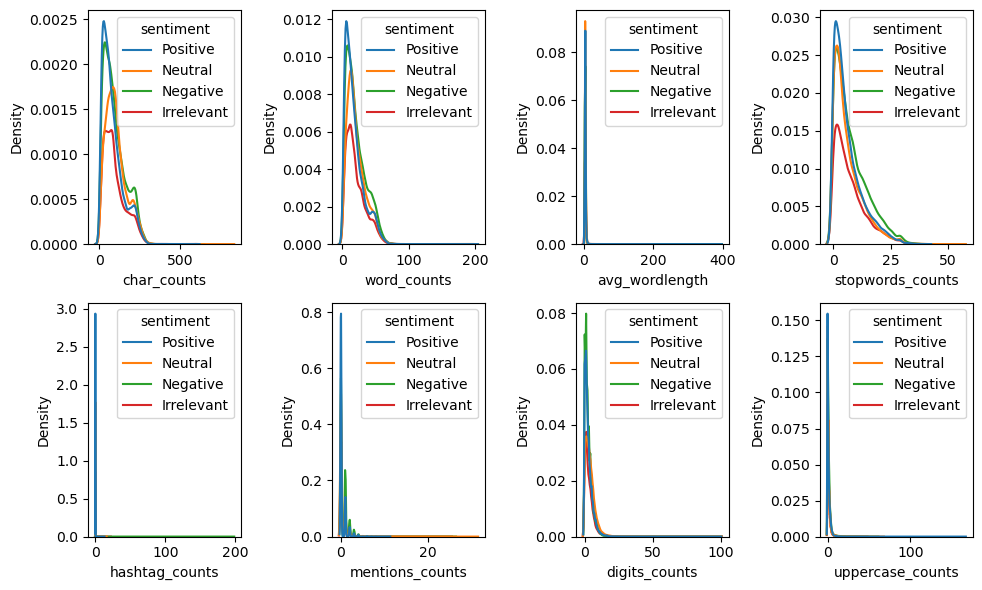

In [48]:
plt.figure(figsize=(10,6))
num_cols=df.select_dtypes(include='number').columns
for index,col in enumerate(num_cols):
    plt.subplot(2,4,index+1)
    sns.kdeplot(data=df,x=col,hue='sentiment',fill=False)
plt.tight_layout()
plt.show()

<Axes: ylabel='count'>

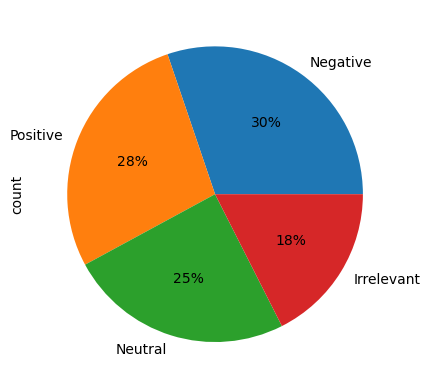

In [49]:
df['sentiment'].value_counts().plot(kind='pie',autopct="%1.0f%%")

In [50]:
!pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   ------ -------------------------------- 51.2/300.2 kB 650.2 kB/s eta 0:00:01
   ----------------------------------- ---- 266.2/300.2 kB 2.3 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 2.3 MB/s eta 0:00:00


In [53]:
from wordcloud import WordCloud,STOPWORDS
stopwords=set(STOPWORDS)


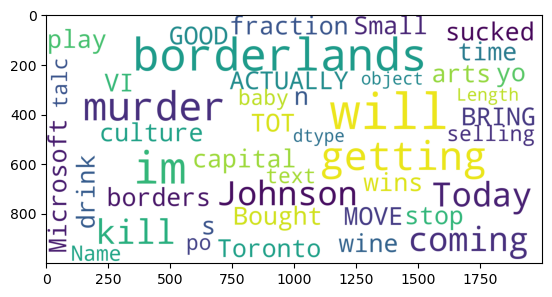

In [55]:
wordcloud=WordCloud(background_color='white',stopwords=stopwords,max_words=300,max_font_size=40,scale=5).generate(str(df['text']))
plt.imshow(wordcloud)

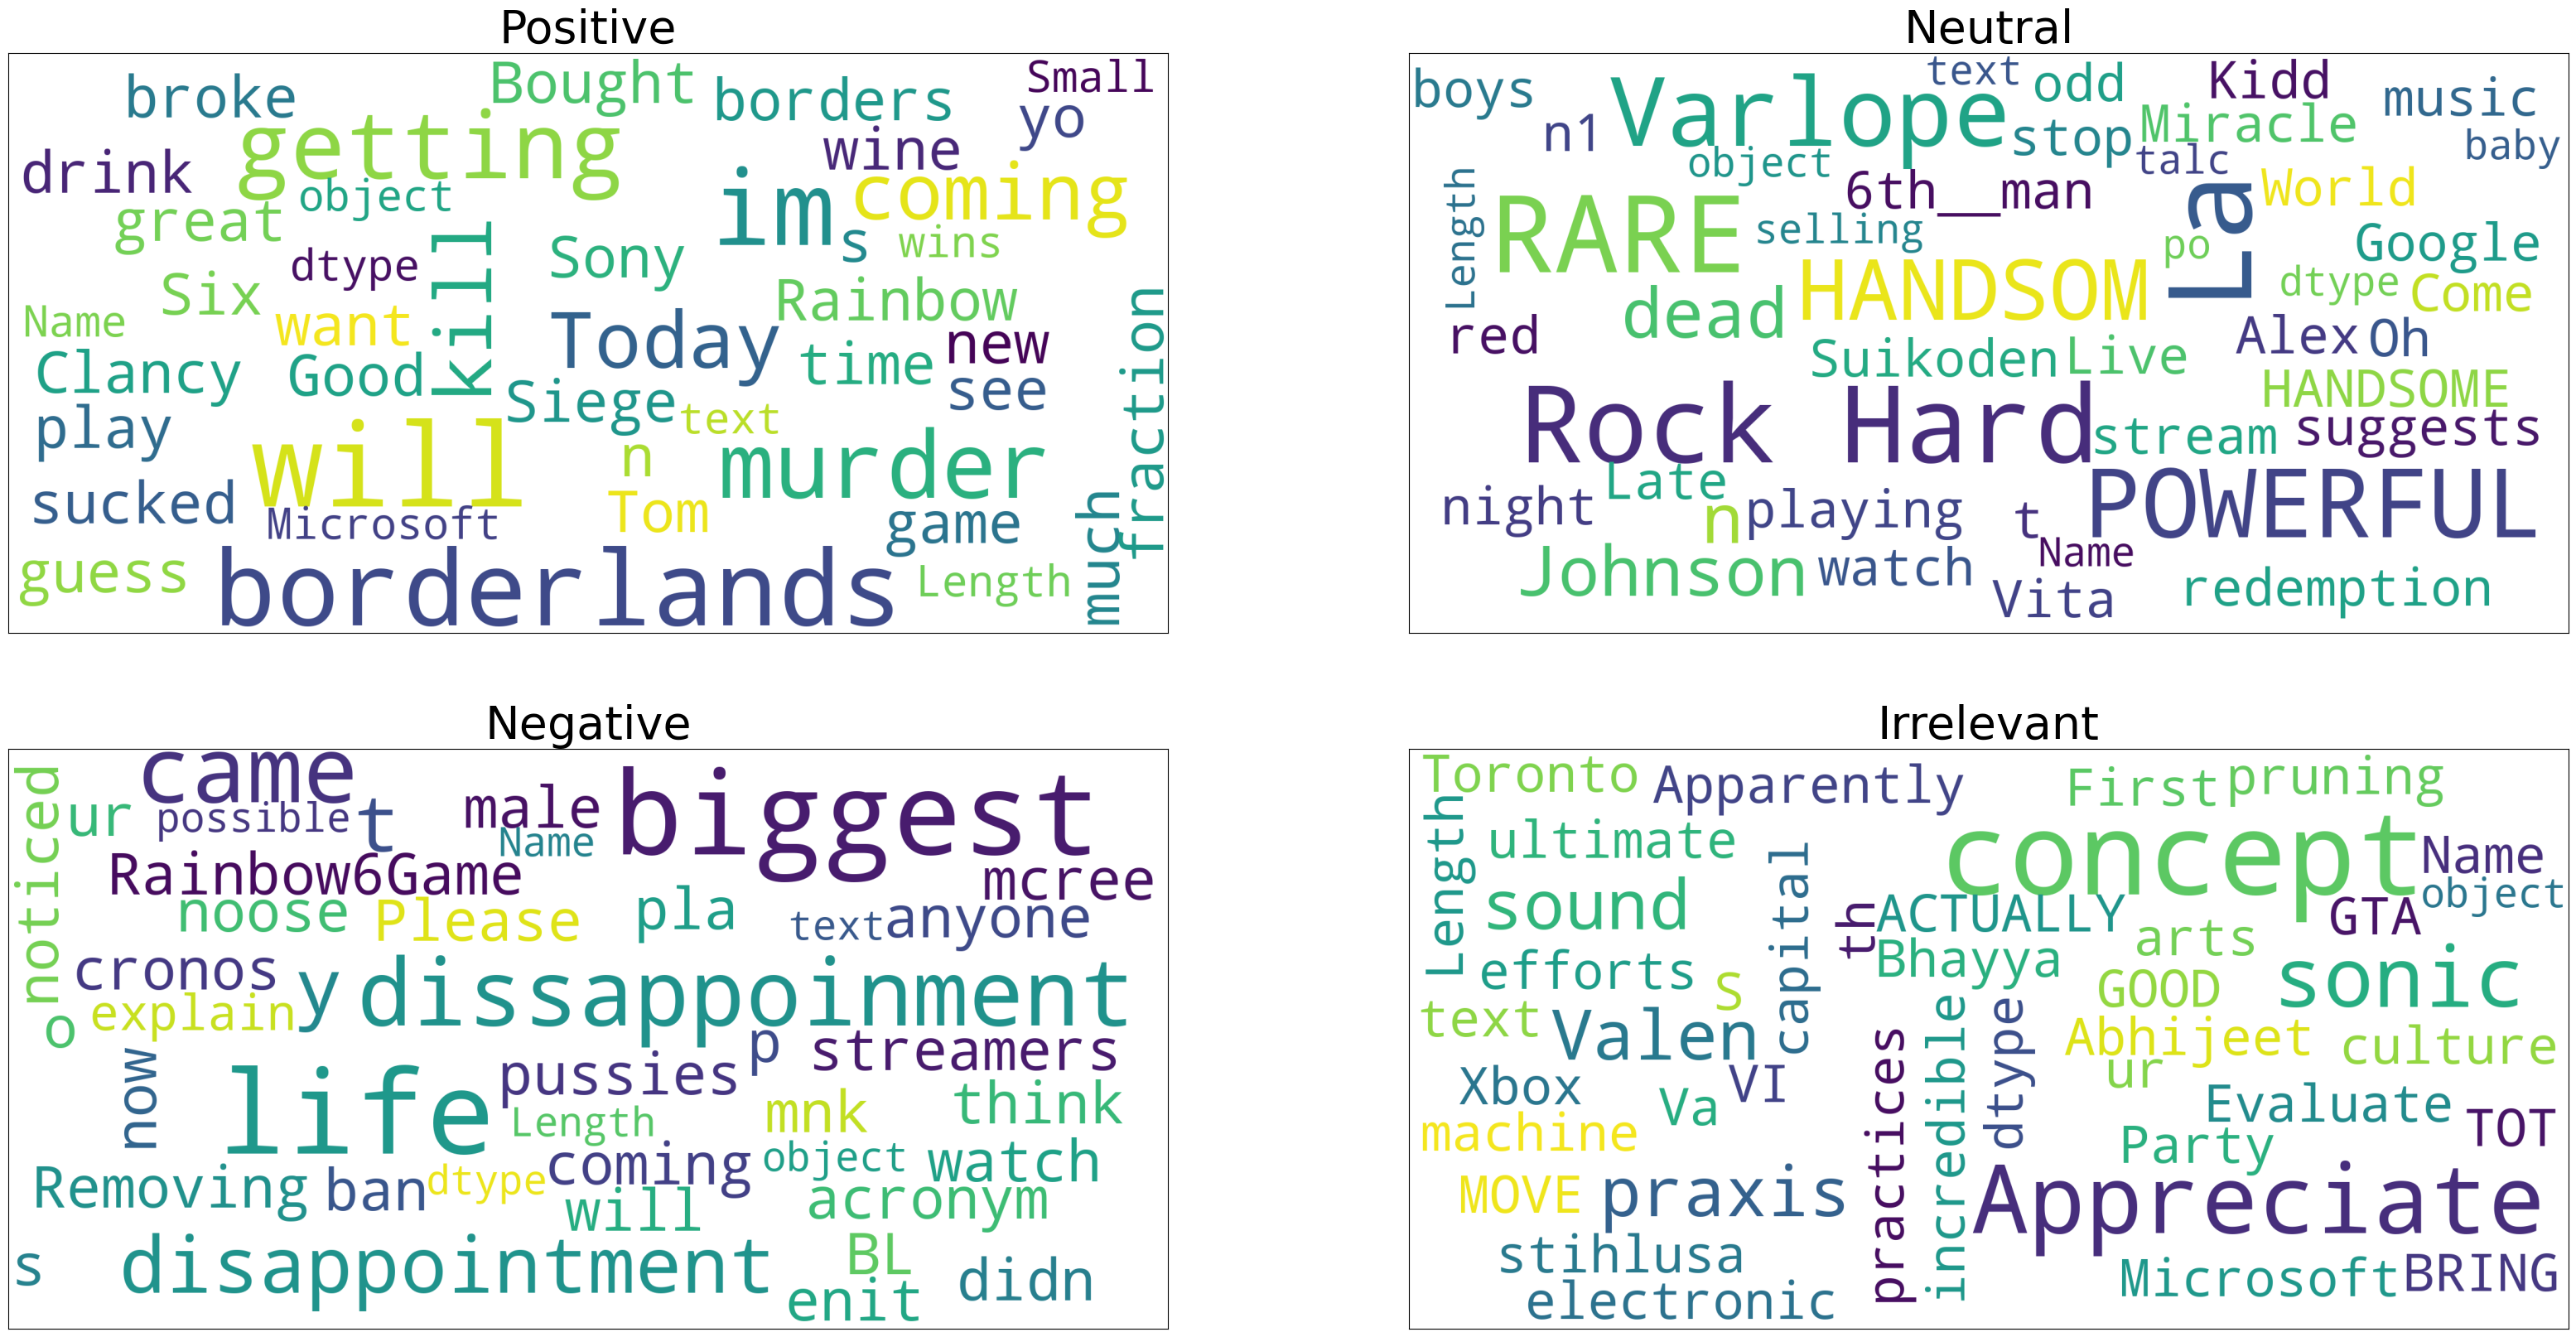

In [60]:
plt.figure(figsize=(40,20))
for index,sent in enumerate(df['sentiment'].unique()):
    plt.subplot(2,2,index+1)
    data=df[df['sentiment']==sent]['text']
    wordcloud=WordCloud(background_color='white',stopwords=stopwords,max_words=300,max_font_size=40,scale=5).generate(str(data))
    plt.imshow(wordcloud)
    plt.xticks([])
    plt.yticks([])
    plt.title(sent,fontsize=40)

In [61]:
#Data Cleaning


In [64]:
df['text']=df['text'].apply(lambda x:x.lower())
df['text']=df['text'].apply(lambda x:ps.remove_urls(x))
df['text']=df['text'].apply(lambda x:ps.remove_html_tags(x))
df['text']=df['text'].apply(lambda x:ps.remove_rt(x))
df['text']=df['text'].apply(lambda x:ps.remove_special_chars(x))

In [ ]:
pip install -U scikit-learn


In [65]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df['text'],df['sentiment'],test_size=0.2,random_state=0)

In [66]:
X_train.shape,X_test.shape

((58306,), (14577,))

In [ ]:
###Model Building and Testing

In [73]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

clf=Pipeline([('tfid',TfidfVectorizer()),('rfc',RandomForestClassifier(n_jobs=-1))])
clf.fit(X_train,y_train)

Pipeline(steps=[('tfid', TfidfVectorizer()),
                ('rfc', RandomForestClassifier(n_jobs=-1))])

In [ ]:
###Evaluation

In [74]:
from sklearn.metrics import classification_report
y_pred=clf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

  Irrelevant       0.98      0.86      0.91      2561
    Negative       0.91      0.96      0.94      4481
     Neutral       0.92      0.91      0.92      3553
    Positive       0.91      0.94      0.93      3982

    accuracy                           0.93     14577
   macro avg       0.93      0.92      0.92     14577
weighted avg       0.93      0.93      0.93     14577



In [75]:
import pickle 
pickle.dump(clf,open('twitter_sentiment.pkl','wb'))

In [76]:
clf.predict(['let me not upset you'])

array(['Negative'], dtype=object)

In [77]:
clf.predict(['I am glad to see you'])

array(['Positive'], dtype=object)

In [78]:
clf.predict(['how the hell are we into halloween month already'])

array(['Irrelevant'], dtype=object)

In [80]:
clf.predict(['i have done nothing but play borderland'])

array(['Positive'], dtype=object)